# 🏥 SOFTEC'25 – Machine Learning Competition  
## 📊 Hospital Readmission Prediction Challenge

Welcome to the SOFTEC'25 Machine Learning competition! In this challenge, your goal is to **build a complete ML pipeline** to predict whether a patient will be readmitted to the hospital within 30 days of discharge.

---

## 🧠 Objective

The task is to create a predictive model that can classify whether a patient will be **readmitted within 30 days** using historical hospital stay data.

**Target Variable: `Readmitted_30`**  
- `1` → Patient was readmitted within 30 days  
- `0` → Patient was not readmitted within 30 days  

---

## 📁 Dataset Overview

The dataset contains structured information about hospital stays, including diagnoses, procedures, admission details, and discharge codes.

### 🔹 Provided Files

| File Name               | Description |
|------------------------|-------------|
| `train.csv`            | Training data with input features and the target variable `Readmitted_30` |
| `test.csv`             | Testing data without the target variable |
| `sample_submission.csv`| A sample format for submitting predictions |
| `metaData.csv`         | Metadata providing column definitions and value descriptions |

---

## 🗂️ Features

Each row in the dataset corresponds to one hospital stay. The features include:

### 📅 Administrative Fields
- `ID` – Unique stay identifier  
- `STAY_FROM_DT` – Admission date  
- `STAY_THRU_DT` – Discharge date  
- `STAY_DRG_CD` – Diagnosis-Related Group code  
- `TYPE_ADM` – Type of admission (e.g., emergency)  
- `SRC_ADMS` – Source of admission  
- `STUS_CD` – Discharge status  
- `AD_DGNS` – Primary admitting diagnosis (ICD code)  

### 🏥 Diagnosis & Procedure Codes
The dataset includes up to **25 diagnosis codes (`DGNSCD01–25`)** and **25 procedure codes (`PRCDRCD01–25`)** per hospital stay.

These are based on **ICD codes** (International Classification of Diseases) and provide clinical insight into the patient's medical condition and treatment during the stay.

---

## 📘 Example Row

| ID     | STAY_FROM_DT       | STAY_THRU_DT       | TYPE_ADM | SRC_ADMS | DGNSCD01 | PRCDRCD01 | ... | Readmitted_30 |
|--------|--------------------|--------------------|----------|-----------|----------|------------|-----|----------------|
| 122086 | 2019-01-10 00:00:00 | 2019-01-11 00:00:00 | 6        | I442      | 0JH606Z  | ...       | 0   |

---

## 🔍 Feature Definitions

Refer to `metaData.csv` for full explanations of each column, including:
- Value categories for codes (e.g., admission types, discharge status)
- ICD code mappings (for diagnosis and procedures)

---

## 📤 Submission Format

Ensure that your submission matches the format in `sample_submission.csv`:
```csv
ID,Readmitted_30
122086,0
122087,1
...


In [1]:
!pip install imbalanced-learn==0.10.1 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/softec-25-machine-learning-competition/sample_submission.csv
/kaggle/input/softec-25-machine-learning-competition/train.csv
/kaggle/input/softec-25-machine-learning-competition/metaData.csv
/kaggle/input/softec-25-machine-learning-competition/test.csv


In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)



In [4]:
# 📦 Importing required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")

# 🤖 ML-specific libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 📦 Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 📂 Load data
train = pd.read_csv("/kaggle/input/softec-25-machine-learning-competition/train.csv")
test = pd.read_csv("/kaggle/input/softec-25-machine-learning-competition/test.csv")
sample_submission = pd.read_csv("/kaggle/input/softec-25-machine-learning-competition/sample_submission.csv")
meta = pd.read_csv("/kaggle/input/softec-25-machine-learning-competition/metaData.csv")


# EDA

<Axes: >

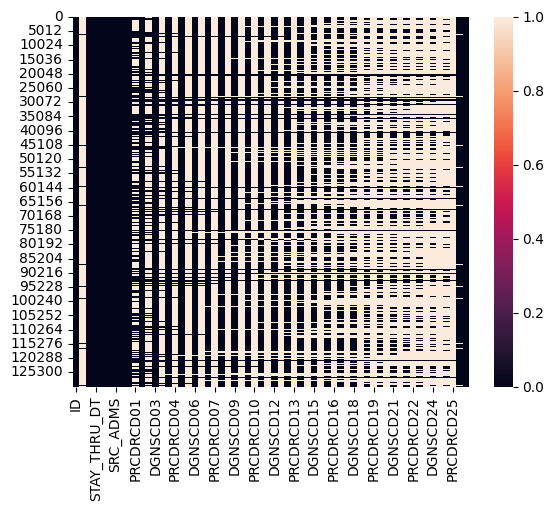

In [6]:
sb.heatmap(train.isnull())

In [7]:
train.head(10)

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30
0,17319,NaN,2017-12-13 00:00:00,2017-12-20 00:00:00,62,1,2,M25551,S72001A,0SRR01Z,...,Z803,NaN,Z86711,NaN,Z86718,NaN,Z85828,NaN,469,0
1,19722,NaN,2017-10-19 00:00:00,2017-10-23 00:00:00,1,1,1,R531,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,1
2,89699,NaN,2018-08-06 00:00:00,2018-08-08 00:00:00,1,1,1,R002,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0
3,8086,NaN,2016-12-20 00:00:00,2016-12-27 00:00:00,62,5,1,K661,K661,NaN,...,I440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393,0
4,68049,NaN,2016-01-06 00:00:00,2016-01-12 00:00:00,6,1,1,J9601,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0
5,31688,NaN,2016-12-16 00:00:00,2016-12-22 00:00:00,6,1,1,J189,J15212,0DJ08ZZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,1
6,55186,NaN,2016-01-24 00:00:00,2016-01-27 00:00:00,6,1,1,R0602,I5023,NaN,...,Z880,NaN,Z79899,NaN,NaN,NaN,NaN,NaN,292,0
7,59815,NaN,2016-02-22 00:00:00,2016-02-26 00:00:00,63,1,5,R0602,J189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193,0
8,80823,NaN,2016-08-04 00:00:00,2016-08-11 00:00:00,1,1,1,R509,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,1
9,130493,NaN,2019-01-24 00:00:00,2019-01-30 00:00:00,3,1,1,R4182,I639,0HBMXZZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,064,0


In [8]:
train.tail(10)

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30
130286,112728,NaN,2018-10-16 00:00:00,2018-10-19 00:00:00,1,2,5,R531,J209,NaN,...,M19012,NaN,M19011,NaN,NaN,NaN,NaN,NaN,202,0
130287,87499,NaN,2017-02-19 00:00:00,2017-02-22 00:00:00,3,1,1,R0902,J440,NaN,...,Z9181,NaN,Z9049,NaN,Z888,NaN,Z2889,NaN,191,0
130288,137338,NaN,2021-09-01 00:00:00,2021-09-10 00:00:00,3,1,5,I959,A419,5A1955Z,...,E875,NaN,C4490,NaN,B952,NaN,NaN,NaN,870,1
130289,54887,NaN,2018-01-19 00:00:00,2018-01-24 00:00:00,3,1,2,R05,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,0
130290,110269,NaN,2020-09-27 00:00:00,2020-10-01 00:00:00,3,1,5,R509,A419,NaN,...,I10,NaN,I4510,NaN,I69920,NaN,NaN,NaN,871,1
130291,119880,NaN,2018-12-18 00:00:00,2018-12-19 00:00:00,1,3,2,R079,T82855A,027035Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,0
130292,103695,NaN,2019-11-23 00:00:00,2019-11-27 00:00:00,6,1,1,R531,I130,3E02340,...,Z79899,NaN,Z23,NaN,I2781,NaN,NaN,NaN,291,1
130293,131933,NaN,2020-12-10 00:00:00,2020-12-17 00:00:00,6,1,1,R197,A419,0DBN8ZX,...,Z9049,NaN,Z90710,NaN,NaN,NaN,NaN,NaN,871,0
130294,146868,NaN,2022-10-10 00:00:00,2022-10-19 00:00:00,3,1,1,R4182,A4159,0BH17EZ,...,R7401,NaN,F209,NaN,I071,NaN,Z9981,NaN,871,0
130295,121959,NaN,2019-04-30 00:00:00,2019-05-03 00:00:00,3,1,1,R05,A419,NaN,...,Z7982,NaN,Z7902,NaN,Z87891,NaN,Z79899,NaN,871,0


In [9]:
import re

# Define the special characters you want to search for
special_chars = r'[!@#$%^&*()_\-+]'

# Create a function to check for special characters
def has_special_chars(val):
    if isinstance(val, str):
        return bool(re.search(special_chars, val))
    return False

# Apply to each column and row
special_char_rows = train.applymap(has_special_chars)

# Get rows where any cell has special characters
rows_with_special_chars = train[special_char_rows.any(axis=1)]

# Show results
print("Rows containing special characters:")
print(rows_with_special_chars)


Rows containing special characters:
            ID  STAY_DRG_CD         STAY_FROM_DT         STAY_THRU_DT  \
0        17319          NaN  2017-12-13 00:00:00  2017-12-20 00:00:00   
1        19722          NaN  2017-10-19 00:00:00  2017-10-23 00:00:00   
2        89699          NaN  2018-08-06 00:00:00  2018-08-08 00:00:00   
3         8086          NaN  2016-12-20 00:00:00  2016-12-27 00:00:00   
4        68049          NaN  2016-01-06 00:00:00  2016-01-12 00:00:00   
...        ...          ...                  ...                  ...   
130291  119880          NaN  2018-12-18 00:00:00  2018-12-19 00:00:00   
130292  103695          NaN  2019-11-23 00:00:00  2019-11-27 00:00:00   
130293  131933          NaN  2020-12-10 00:00:00  2020-12-17 00:00:00   
130294  146868          NaN  2022-10-10 00:00:00  2022-10-19 00:00:00   
130295  121959          NaN  2019-04-30 00:00:00  2019-05-03 00:00:00   

        STUS_CD  TYPE_ADM  SRC_ADMS AD_DGNS DGNSCD01 PRCDRCD01  ... DGNSCD22  \
0      

In [10]:
# 💡 Percentage
readmit_rate = train['Readmitted_30'].mean() * 100
print(f"🔁 Readmission Rate: {readmit_rate:.2f}%")

🔁 Readmission Rate: 20.49%


In [11]:
# 🧮 Numerical Summary
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
train[numeric_cols].describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
ID,130296.000000,81315.674833,47062.963000,2.000000,40507.750000,81315.500000,122083.500000,162871.000000
STAY_DRG_CD,3798.000000,430.033175,230.927115,23.000000,291.000000,309.000000,682.000000,981.000000
STUS_CD,130296.000000,7.427434,16.370187,1.000000,1.000000,3.000000,6.000000,63.000000
TYPE_ADM,130296.000000,1.263838,0.649099,1.000000,1.000000,1.000000,1.000000,9.000000
SRC_ADMS,130296.000000,1.482478,1.200835,1.000000,1.000000,1.000000,1.000000,5.000000
Readmitted_30,130296.000000,0.204903,0.403632,0.000000,0.000000,0.000000,0.000000,1.000000


# Preprocesing

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
# 🎯 Target column
target = "Readmitted_30"

# 🧼 Replace '?' with NaN
train.replace("?", np.nan, inplace=True)
test.replace("?", np.nan, inplace=True)

# 🔍 Drop high-null columns (>60%)
threshold = 0.6
cols_to_drop = train.columns[train.isnull().mean() > threshold].tolist()
test_cols_to_drop = test.columns[test.isnull().mean() > threshold].tolist()
all_cols_to_drop = list(set(cols_to_drop + test_cols_to_drop))
train.drop(columns=all_cols_to_drop, inplace=True)
test.drop(columns=all_cols_to_drop, inplace=True)

# 🕒 Date Columns
for df in [train, test]:
    df["STAY_FROM_DT"] = pd.to_datetime(df["STAY_FROM_DT"])
    df["STAY_THRU_DT"] = pd.to_datetime(df["STAY_THRU_DT"])
    df["LOS"] = (df["STAY_THRU_DT"] - df["STAY_FROM_DT"]).dt.days
    df.drop(["STAY_FROM_DT", "STAY_THRU_DT"], axis=1, inplace=True)

# 🔤 Label Encoding
cat_cols = train.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    combined = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# 🎯 Split features and labels
X = train.drop(columns=[target], errors="ignore")
y = train[target]

# 🧮 Impute & Scale
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
test = pd.DataFrame(imputer.transform(test), columns=test.columns)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

# Model

Training Set Shape: (104236, 27)
Validation Set Shape: (26060, 27)
After SMOTE - Balanced Training Set Shape: (165756, 27)

🔹 Training RandomForest...
RandomForest Accuracy: 0.7778
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     20720
           1       0.28      0.06      0.09      5340

    accuracy                           0.78     26060
   macro avg       0.54      0.51      0.48     26060
weighted avg       0.69      0.78      0.71     26060



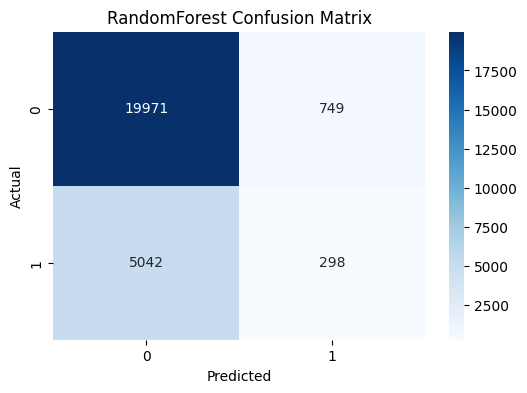


🔹 Training XGBoost...
XGBoost Accuracy: 0.5534
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66     20720
           1       0.25      0.60      0.35      5340

    accuracy                           0.55     26060
   macro avg       0.55      0.57      0.51     26060
weighted avg       0.72      0.55      0.60     26060



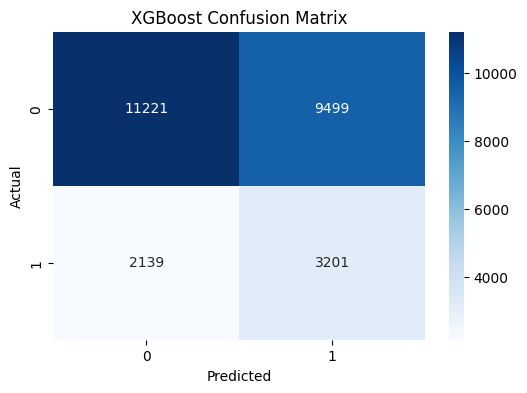


🔹 Training LogisticRegression...
LogisticRegression Accuracy: 0.5399
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.52      0.64     20720
           1       0.25      0.61      0.35      5340

    accuracy                           0.54     26060
   macro avg       0.54      0.57      0.50     26060
weighted avg       0.72      0.54      0.58     26060



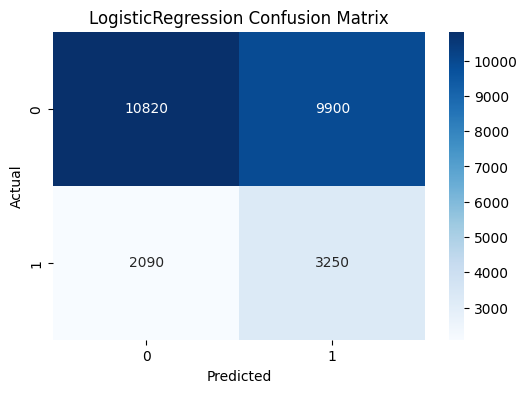

In [14]:


# 📚 Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

# 📈 Apply SMOTE to balance classes in training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE - Balanced Training Set Shape:", X_train_bal.shape)

# 🚀 Define ML models with class_weight for imbalance
models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1]),
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced')
}

# 🔁 Train & Evaluate
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_val)

    acc = accuracy_score(y_val, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_val, preds))

    # 📊 Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_val, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


 # Submission

In [15]:
# 📤 Create submission using best model
best_model = models["RandomForest"]  # or "RandomForest"
test_preds = best_model.predict(test)
submission = pd.DataFrame({
    "ID": pd.read_csv("/kaggle/input/softec-25-machine-learning-competition/test.csv")["ID"],
    "Readmitted_30": test_preds
})
submission.to_csv("submission_ml.csv", index=False)

print("✅ ML submission file created!")


✅ ML submission file created!
